# Housing Prediction

#### The project focuses on analyzing the most relevant features to carry out house price prediction using Machine Learning. Predicting house prices is valuable not only for the investment decision-making process but also for sellers, buyers, insurers and even the government in formulating housing policies. 

#### Given the goal of this project, the target variable is quantitative, and since there is continuity in the outcome (target variable: price and is continuous), this problem is undoubtedly a regression problem. In other words, we aim to predict a continuous value (the price) based on the provided input features, considering the infinite number of possible price values. 

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
#from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_regression
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('Housing.csv') 

## Characterization of the data 

#### * Let's check the dataset.

In [21]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


#### * There are categorical and numerical datapoints. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [23]:
df.shape

(545, 13)

#### * The dataset has 545 observations and 13 variables. 

In [24]:
df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### * There are not duplicated cells.

In [25]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### * There are not missing values. 

In [26]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

#### * There are cells represented as strings, let's convert them to numerical data for the machine learning models. Ensuring that the features are in a suitable format is crucial for effective model training. 

In [27]:
df["mainroad"].replace ({'no':0, 'yes':1}, inplace = True)
df["guestroom"].replace ({'no':0, 'yes':1}, inplace = True)
df["basement"].replace ({'no':0, 'yes':1}, inplace = True)
df["hotwaterheating"].replace ({'no':0, 'yes':1}, inplace = True)
df["airconditioning"].replace ({'no':0, 'yes':1}, inplace = True)
df["prefarea"].replace ({'no':0, 'yes':1}, inplace = True)
df["furnishingstatus"].replace ({'furnished':0, 'semi-furnished':1, 'unfurnished' :2}, inplace = True)

In [28]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


In [29]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [30]:
df.dtypes.value_counts()

int64    13
Name: count, dtype: int64

#### * The dataset is suitable for fitting the machine learning models. However, before doing so, the price column has been removed from the features and coded as the target variable. 

In [31]:
X = df.drop("price", axis=1)
y = df["price"]

#### * Let's check if the encoding works...

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [33]:
print(X, y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

#### * Here some frequency graphs of the features. 

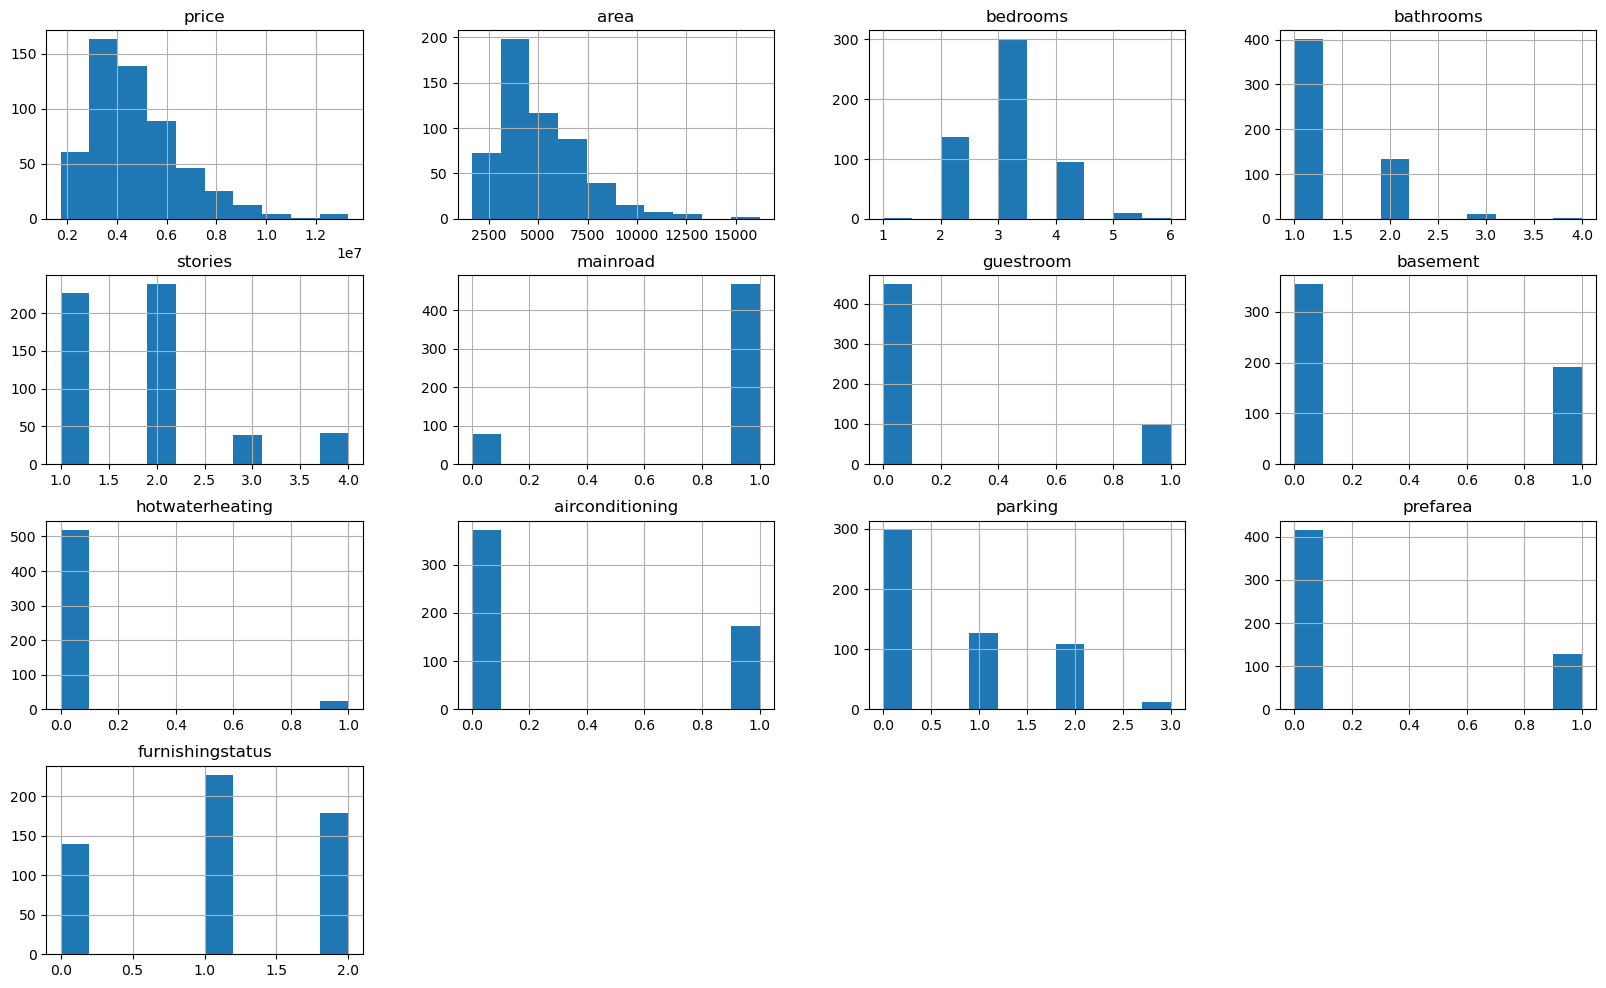

In [34]:
df.hist(figsize = (20, 12))
plt.show()

In [35]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


#### * There are features such as area, number of bathrooms, and bedrooms, as well as the availability of air conditioning, which have a stronger correlation with the price compared to the furnishing status of the house and the installation of hot water heating in the property. The next heatmap is plotted to check the correlations for each column.

<Axes: >

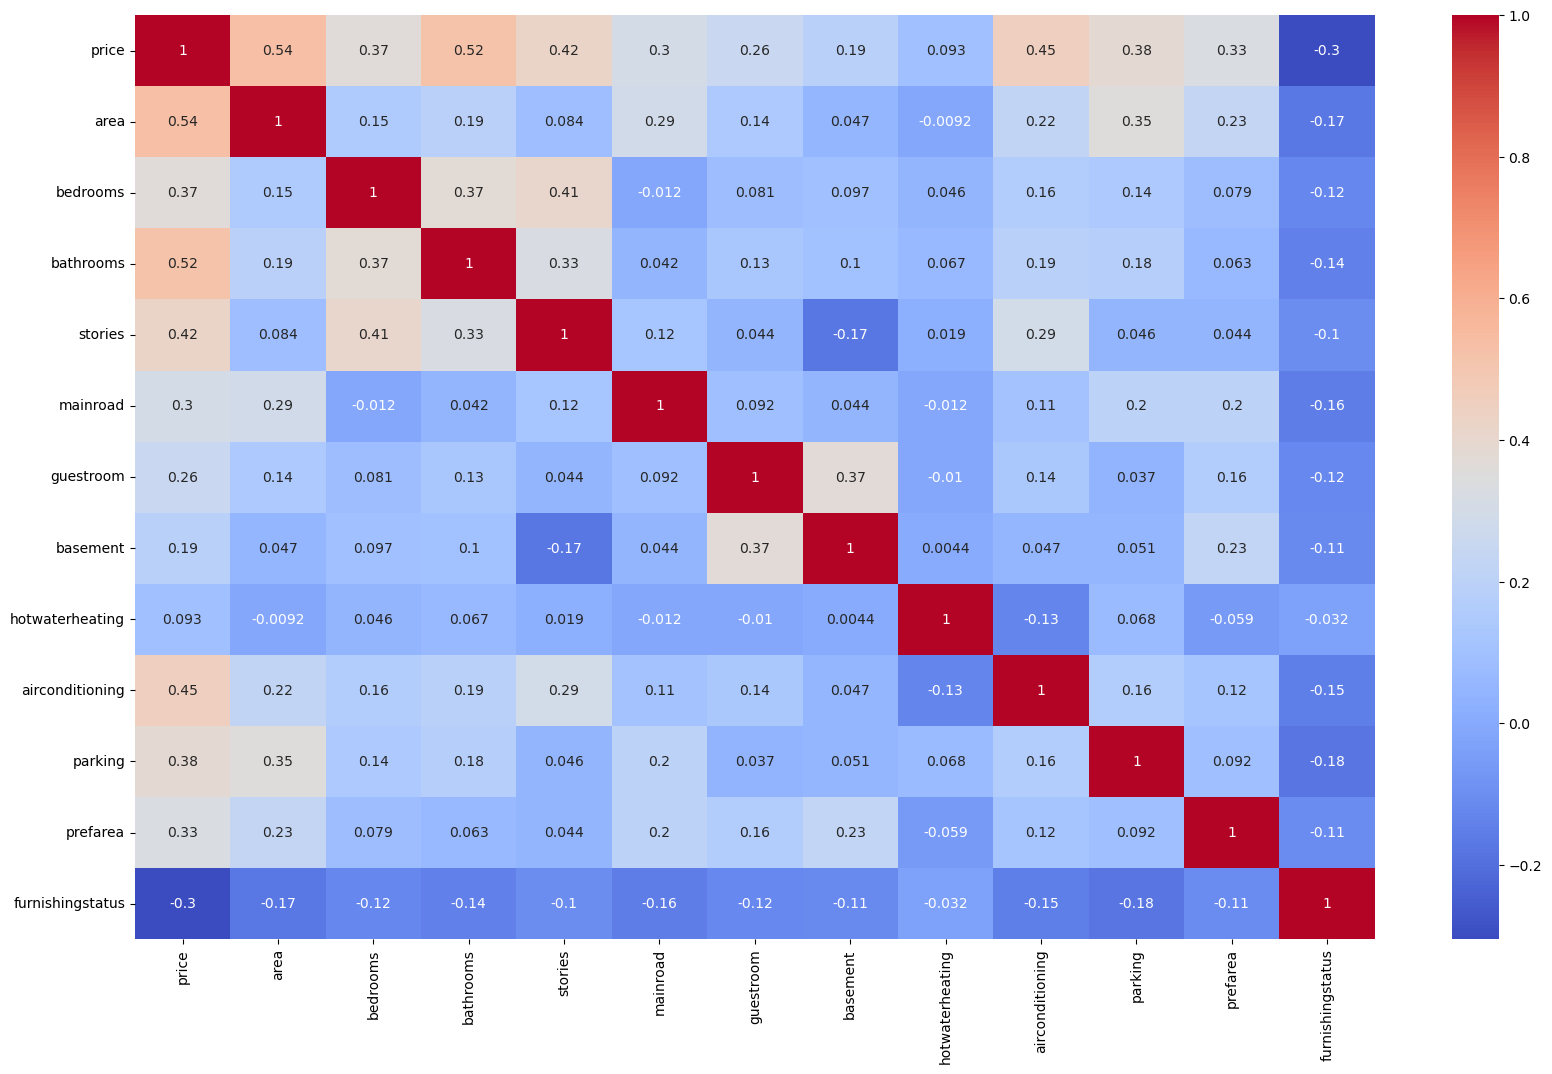

In [36]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [37]:
X = df.drop("price", axis=1)
y = df["price"]

In [38]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


## Preprocessing the data

## Splitting Data into Training and Testing

In [39]:
from sklearn.model_selection import train_test_split 

#### Splitting the data into training and testing sets is helpful to "estimate the performance of the machine learning algorithms when they are used to make predictions on data not used to train the model" (Brownlee, 2020). It is also important to mention that this technique can be used for both classification or regression problems, as well, as for any supervised learning algorithm. 

#### Keeping in mind that: 

#### The train dataset is used to fit the machine learning model ,and
#### The Test dataset is employed to evaluate the model's performance,  

#### The variation in the accuracy (in this case, r2, as it is a regression problem) across different machine learning models includes three training splits, as shown below: 

* Train: 80%, Test: 20%

* Train: 75%, Test: 25%

* Train: 70%, Test: 30%

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [41]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((545, 12), (545,), (436, 12), (109, 12), (436,), (109,))

#### The test_size variable is "where we actually specify the proportion of the test set" (Chauhan,2019).

#### Before building a model, it is helpful to have an overview of the dataset to determine whether the dataset needs to be scaled or not. 

In [43]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


#### It is concluded that it is necessary to scale the dataset to reduce bias impact in machine learning algorithms. Additionally, "neglecting scaling can unevenly influence regression problem, favoring some variables unfairly and disadvantaging certain classes during model training" (Cosgun, 2023). Although, the Robust Scaler helps decrease the impact of outliers in features like area, as part of this pre-processing, StandardScaler is applied, considering that the rest of the features seem to be on similar scales. However, there is no disagreement with (Cosgun, 2023) when it is stated that "feature scaling relies on trial and error rather than a singular solution". 

## Scaling the data

In [44]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## Machine learning approaches 

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### The first machine learning model to be applied is Random Forest: 
* Commonly, "the feature importances given by this model are more reliable than the ones provided by a single tree.
* Regularly, it works well without heavy tuning of the parameters"(Muller and Guido,2017).
* This model is flexible, versatile, and easy to use for capturing the pattern in the data. 

In [50]:
rf_model = RandomForestRegressor( max_features="sqrt", max_depth=40, random_state=42).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

In [51]:
mse=mean_squared_error(y_train, y_train_pred)
print(f'Mean Square Error_train: {mse}')

mse=mean_squared_error(y_test, y_pred)
print(f'Mean Square Error_test: {mse}')

r2=r2_score(y_train, y_train_pred)
print(f'R-squared_train: {r2}')

r2=r2_score(y_test, y_pred)
print(f'R-squared_test: {r2}')

Mean Square Error_train: 155605241749.72678
Mean Square Error_test: 1965743117790.1614
R-squared_train: 0.9495344015005687
R-squared_test: 0.6110958950059353


#### After calculating measures of performance on the training set and the testing set, considering the difference between the metrics of each of them, it is clear that there is overfitting because the model performs very well for training data but not with the testing data. 

In [52]:
predictions = rf_model.predict(X)
print(f'Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print(f'R-squared:', metrics.r2_score(y, predictions))

Mean Squared Error: 517632816957.8138
R-squared: 0.8517713954352004


#### Regarding the performance of the model the accuracy, calculated using the R-squared is good (0.85)

### Hyperparameter tuning techniques

#### It is known that every machine learning model, as a mathematical model, has several number of parameters. However, hyperparameters are another kind of parameters that are used to find the best performance of a model through a process called Hyperparameter tuning. In this project, and particularly for this model, two Hyperparameter tuning techniques are applied: 

 * Random Hyperparameter Grid
 * Grid Search CV
 
#### Considering the explanation given in scikit-learn, "GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution" (scikit-learn). 

#### Random Hyperparameter Grid

In [53]:
from sklearn.model_selection import RandomizedSearchCV

#### To use RandomizedSearchCV, the first step is to create a parameter grid to use it during fitting. In the case of a random forest, for instance, the number of decision trees is one hyperparameter. 

In [54]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop= 600, num= 10)]
max_features= ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace (10, 200, num =11)]
max_depth.append(None)
min_samples_split= [2,5,8,10]
min_samples_leaf = [1,2,4,6]
bootstrap = [True, False]

##### Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap':bootstrap}

print(param_grid)

rf = RandomForestRegressor()
rf_random=RandomizedSearchCV (estimator= rf, param_distributions=param_grid, n_iter= 100, cv=10, verbose=2, random_state=42)

rf_random.fit(X_train,y_train)

{'n_estimators': [50, 111, 172, 233, 294, 355, 416, 477, 538, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 29, 48, 67, 86, 105, 124, 143, 162, 181, 200, None], 'min_samples_split': [2, 5, 8, 10], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END bootstrap=False, max_depth=124, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=172; total time=   0.0s
[CV] END bootstrap=False, max_depth=124, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=172; total time=   0.0s
[CV] END bootstrap=False, max_depth=124, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=172; total time=   0.0s
[CV] END bootstrap=False, max_depth=124, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=172; total time=   0.0s
[CV] END bootstrap=False, max_depth=124, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_esti

[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=105, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=538; total time=   0.0s
[CV] END bootstrap=True, max_depth=105, 

[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=111; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, 

[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, m

[CV] END bootstrap=True, max_depth=143, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=172; total time=   0.0s
[CV] END bootstrap=True, max_depth=143, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=172; total time=   0.0s
[CV] END bootstrap=True, max_depth=143, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=172; total time=   0.0s
[CV] END bootstrap=True, max_depth=143, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=172; total time=   0.0s
[CV] END bootstrap=True, max_depth=143, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=172; total time=   0.0s
[CV] END bootstrap=True, max_depth=143, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=172; total time=   0.0s
[CV] END bootstrap=True, max_depth=143, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=172; total time=   0.0s
[CV] END bootstrap=True, max_depth=143, m

[CV] END bootstrap=False, max_depth=162, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=162, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=162, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=162, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=162, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth=67, max_

[CV] END bootstrap=True, max_depth=181, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=181, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=181, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=181, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=181, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=124, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=233; total time=   0.1s
[CV] END bootstrap=False, max_depth=124, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=233; total time=   0.1s
[CV] END bootstrap=False, max_depth=124

[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, max_depth=48, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=233; total time=   0.0s
[CV] END bootstrap=True, max_depth=48, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=416; total time=   0.0s
[CV] END bootstrap=True, max_depth=48, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=416; total time=   0.0s
[CV] END bootstrap=True, max_depth=48, ma

[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=538; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=538; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=538; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=538; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=538; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=538; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=538; total time=   0.2s
[CV] END bootstrap=F

[CV] END bootstrap=True, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=86, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.1s
[CV] END bootstrap=True, max_depth=86, ma

[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, max_depth=143, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.0s
[CV] END bootstrap=False, m

[CV] END bootstrap=True, max_depth=200, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth=200, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth=200, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth=200, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth=200, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth=200, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth=200, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=233; total time=   0.1s
[CV] END bootstrap=True, max_depth

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 29, 48, 67, 86, 105,
                                                      124, 143, 162, 181, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 8, 10],
                                        'n_estimators': [50, 111, 172, 233, 294,
                                                         355, 416, 477, 538,
                                                         600]},
                   random_state=42, verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 477,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 67,
 'bootstrap': False}

#### Given the best parameters by the hyperparameter tuning process, they are applied in the algorithm again to perform the model. 

In [56]:
rf_random = RandomForestRegressor(n_estimators=477, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth=67, random_state=42, bootstrap=True)
rf_random.fit(X_train,y_train)

RandomForestRegressor(max_depth=67, max_features='sqrt', n_estimators=477,
                      random_state=42)

In [57]:
predictions = rf_random.predict(X)
print(f'Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print(f'R-squared:', metrics.r2_score(y, predictions))

Mean Squared Error: 502228122867.59235
R-squared: 0.8561826619429173


#### Actually, the r2 increased by a few decimal points, from 0.8517 to 0.8561. 

#### Let's move forward to try another technique- one that "instead of sampling randomly from a distribution as RandomizedSearchCV does, evaluates all combinations we define" (Koehrsen, 2018).

#### GridSearchCV

#### To use this technique, it is necessary to define an additional grid, as shown below. 

In [58]:
from sklearn.model_selection import GridSearchCV

n_estimators =[int(x) for x in np.linspace(start = 50, stop= 700, num= 10)]

param_grid= {'bootstrap': [True], 'max_depth': [67], 'max_features': ['sqrt'], 'min_samples_leaf':[2], 'min_samples_split':[5], 'n_estimators': n_estimators}

rf=RandomForestRegressor()

rf_grid= GridSearchCV(estimator=rf, param_grid = param_grid, cv=10, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=

[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=483; total time=   0.3s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=483; total time=   0.3s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=483; total time=   0.3s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=483; total time=   0.3s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=483; total time=   0.3s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=483; total time=   0.3s
[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=483; total time=   0.3s
[CV] END bootstrap=True, max_depth=67, max_featu

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [67],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2],
                         'min_samples_split': [5],
                         'n_estimators': [50, 122, 194, 266, 338, 411, 483, 555,
                                          627, 700]},
             verbose=2)

In [59]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 67,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 266}

#### Given the best parameters by the hyperparameter tuning process, they are applied in the algorithm again to perform the model.

In [60]:
rf_grid = RandomForestRegressor(n_estimators=627, max_features="sqrt", max_depth=67, bootstrap= True, min_samples_leaf=2, min_samples_split=5, random_state=42)
rf_grid.fit(X_train,y_train)

RandomForestRegressor(max_depth=67, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=627, random_state=42)

In [61]:
predictions = rf_grid.predict(X)
print(f'Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print(f'R-squared:', metrics.r2_score(y, predictions))

Mean Squared Error: 823872275170.9597
R-squared: 0.7640770954091757


#### Using the GridSearchCV technique, the R2 performs even worse than with the first tecnique. However, to get a better estimate of the generalization performance, instead of applying the conventional split of the data into training and testing set, cross-validation can be used to evaluate the performance in each model (Muller and Guido,2017). 

### Cross validation on the model

In [62]:
from sklearn.model_selection import cross_val_score

models = [{"model": rf_model, "name": "Base Model"}, {"model": rf_random, "name": "Random Model"}, {"model": rf_grid, "name": "Grid Model"}]

for model in models:
    scores = cross_val_score(model["model"], X_train,y_train, cv=5, scoring= 'r2')
    print("Model:", model ["name"])
    print("R2 Scores:", scores)
    print("Mean R2 score:", scores.mean())
    print("Standard Deviation of R2 scores", scores.std())
    print("\n")
    

Model: Base Model
R2 Scores: [0.63827971 0.64165088 0.6538202  0.589176   0.6042066 ]
Mean R2 score: 0.6254266765847211
Standard Deviation of R2 scores 0.024490901113859487


Model: Random Model
R2 Scores: [0.65272248 0.66211032 0.65258291 0.59985444 0.61381509]
Mean R2 score: 0.6362170483224304
Standard Deviation of R2 scores 0.024636636161327698


Model: Grid Model
R2 Scores: [0.66278744 0.66271053 0.66163572 0.62215976 0.60488892]
Mean R2 score: 0.6428364757669899
Standard Deviation of R2 scores 0.024551879923540094




#### Overall, R2 around 0.62 and 0.64 is not very good in the cross validation. 

#### SUPPORT VECTOR REGRESSION 

#### Let's try another model to perform. This  model is chosen because it is robust to outliers and can manage non-linear data by introducing a kernel function. 

In [63]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train,y_train)

SVR()

In [64]:
predictions = svr_model.predict(X)
print(f'Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print(f'R-squared:', metrics.r2_score(y, predictions))

Mean Squared Error: 3718385940944.3765
R-squared: -0.06479176204254


#### Although, there are many reasons that might explain this result, in overall, R2 is negative as the model does not follow the trend of the data, considering as well that there is a case of overfitting in the model. 

### Hyperparameter tuning techniques

#### To this model, the GridSearchCV is applied. 

In [65]:
param_grid = { 'C': [1,5,10], 'gamma': ['auto', 'scale']}

model_svr = SVR()

svr_grid= GridSearchCV(model_svr, param_grid, cv=5)

svr_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 5, 10], 'gamma': ['auto', 'scale']})

In [66]:
svr_grid.best_params_

{'C': 10, 'gamma': 'scale'}

#### Given the best parameters by the hyperparameter tuning process, they are applied in the algorithm again to perform the model. 

In [67]:
svr_model = SVR(C= 10, gamma = 'scale')

In [68]:
predictions = svr_grid.predict(X)
print(f'Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print(f'R-squared:', metrics.r2_score(y, predictions))

Mean Squared Error: 3717869610138.6577
R-squared: -0.06464390628008032


#### After finding and using the best parameters, the R2 is less negative. Thus, although, it is clear that this model does not perform well, in practice, it can be seen the usefulness of applying these kind of techiques. 

### Cross validation on the model 

In [69]:
models = [{"model": svr_model, "name": "Base Model"}, {"model": svr_grid, "name": "Grid Model"}]

for model in models:
    scores = cross_val_score(model["model"], X_train,y_train, cv=20, scoring= 'r2')
    print("Model:", model ["name"])
    print("R2 Scores:", scores)
    print("Mean R2 score:", scores.mean())
    print("Standard Deviation of R2 scores", scores.std())
    print("\n")

Model: Base Model
R2 Scores: [-0.05453663 -0.00243703 -0.25778701 -0.35903157 -0.42087139 -0.03125725
 -0.04612047 -0.03998061 -0.06870607 -0.22141045 -0.01988811 -0.01176745
 -0.19294878 -0.10948066 -0.05477312 -0.00460797 -0.08744445 -0.09081897
 -0.00425453 -0.13159238]
Mean R2 score: -0.11048574590229539
Standard Deviation of R2 scores 0.117425349423357


Model: Grid Model
R2 Scores: [-0.05453663 -0.00243703 -0.25778701 -0.35903157 -0.42087139 -0.03125725
 -0.04612047 -0.03998061 -0.06870607 -0.22141045 -0.01988811 -0.01176745
 -0.19294878 -0.10948066 -0.05477312 -0.00460797 -0.08744445 -0.09081897
 -0.00425453 -0.13159238]
Mean R2 score: -0.11048574590229539
Standard Deviation of R2 scores 0.117425349423357




#### With negative mean R2 scores in the cross validation, it is determined that this model performed poorly.

### KNN

#### Let's choose another model to perform, which is able to handle noisy data, makes predictions based on the comparability of data points in a dataset, is less sensitive to outliers, and requires few hyperparameters. 

In [70]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [71]:
predictions = knn_reg.predict(X)
print(f'Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print(f'R-squared:', metrics.r2_score(y, predictions))


Mean Squared Error: 1343242856293.4404
R-squared: 0.6153508671451966


#### R2 of around 0.61 is not very well. 

### Hyperparameter tuning techniques

In [72]:
param_grid= {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

knn = KNeighborsRegressor()

knn_grid= GridSearchCV(knn, param_grid, cv=5)

knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [73]:
knn_grid.best_params_

{'n_neighbors': 7}

In [74]:
best_knn= KNeighborsRegressor(n_neighbors=7)
best_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [75]:
predictions = knn_grid.predict(X)
print(f'Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print(f'R-squared:', metrics.r2_score(y, predictions))

Mean Squared Error: 1852414260325.5046
R-squared: 0.4695452608709645


### Cross validation on the model

In [76]:
models = [{"model": knn_reg, "name": "Base Model"}, {"model": knn_grid, "name": "Grid Model"}]

for model in models:
    scores = cross_val_score(model["model"], X_train,y_train, cv=5, scoring= 'r2')
    print("Model:", model ["name"])
    print("R2 Scores:", scores)
    print("Mean R2 score:", scores.mean())
    print("Standard Deviation of R2 scores", scores.std())
    print("\n")
    

Model: Base Model
R2 Scores: [ 0.23225703  0.30971057 -0.29374585  0.10010475  0.24502696]
Mean R2 score: 0.11867069199963456
Standard Deviation of R2 scores 0.21716173531946653


Model: Grid Model
R2 Scores: [0.26880268 0.40489967 0.333073   0.30198121 0.31640408]
Mean R2 score: 0.32503212995263475
Standard Deviation of R2 scores 0.045190749971946




#### With lower mean R2 scores in the cross validation, it is determined that this model performed poorly.

#### Following the results of the variation in the accuracy (R2) across three training splits using cross validation:

    Split 1: 20%
        *Random Forest:0.6428
        *Support vector regression:-0.1104
        *KNN: 0.3250
            
    Split 2: 25%
        *Random Forest:0.6306
        *Support vector regression:-0.1532
        *KNN: 
            
    Split 3: 30%
        *Random Forest:0.6135
        *Support vector regression:-0.1232
        *KNN: 0.2939
        

### Conclusions

•	The dataset contains numerical and categorical variables used to predict housing prices. Before preprocessing, it was necessary to convert the categorical variables to numerical ones.  
•	Splitting the data into training and testing sets is useful for evaluating the performance of a machine-learning algorithm. These sets ensure that the model is tested on data it has not seen during training.  
•	Scaling the data is a good practice during pre-processing. It brings all data points to the same scale, preventing any single feature from dominating the performance of the algorithm. 
•	The Python module Scikit-Learn provides default parameters and hyperparameters for all the models. However, tuning a model is often a trial-and-error process because hyperparameters do not guarantee optimal performance right away.  
•	After calculating performance metrics on both the training and testing sets, it is evident that overfitting occurs. The model performs well on the training data but struggles with the testing data.
•	Hyperparameters play a crucial role in achieving the best model performance through a process called  Hyperparameter tuning



# References


   Brownlee, Jason. “Train-Test Split for Evaluating Machine Learning Algorithms.” Machine Learning Mastery, 23 July 2020, machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/.

Chauhan, Nagesh Singh. “A Beginner’s Guide to Linear Regression in Python with Scikit-Learn.” KDnuggets, www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html#:~:text=The%20test_size%20variable%20is%20where. Accessed 21 Apr. 2024.

Coşgun, Hasan Hüseyin. “Which Data Scaling Technique Should I Use ?” Medium, 5 Aug. 2023, medium.com/@hhuseyincosgun/which-data-scaling-technique-should-i-use-a1615292061e#:~:text=RobustScaler%20is%20a%20data%20preprocessing. Accessed 21 Apr. 2024.

Dutta, Avik. “Random Forest Regression in Python - GeeksforGeeks.” GeeksforGeeks, 14 June 2019, www.geeksforgeeks.org/random-forest-regression-in-python/.

Koehrsen, Will. “Hyperparameter Tuning the Random Forest in Python.” Medium, Towards Data Science, 10 Jan. 2018, towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74.

Müller, Andreas C, and Sarah Guido. Introduction to Machine Learning with Python : A Guide for Data Scientists. Beijing, O’reilly, 2017.

Scikit-learn . “Compare the Effect of Different Scalers on Data with Outliers.” Scikit-Learn, scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section. Accessed 21 Apr. 2024.
 

